# 1. Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)

%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# 2. Load the dataset

In [2]:
#reading the CSV file into pandas dataframe
bank_data=pd.read_csv('data/bank-full.csv')

In [3]:
#Check top few records of the dataset
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


* It shows that there are sixteen independent variables ( age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, compaign, pdays, previous, poutcome) and one dependent variable (Target).
* There are many columns which are not numeric.

In [4]:
#Check the last few records of the dataset
bank_data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# 3. Exploratory data quality report

## 3.1. Univariate analysis

### Data Types and description

In [5]:
#To show the detailed summary 
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* It shows the number of rows, number of columns, data types information, Memory usage, number of null values in each column. 

In [6]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

* It gives the data types of each column of the dataset. Most of the columns such as job, marital, education, default, housing, loan, contact, month, poutcome, Target are categorical data types. Here, it is showing object data type. So, we have to convert these to categorical data type.

In [7]:
bank_data['Target']=bank_data.Target.astype('category')
bank_data['job']=bank_data.job.astype('category')
bank_data['marital']=bank_data.marital.astype('category')
bank_data['education']=bank_data.education.astype('category')
bank_data['default']=bank_data.default.astype('category')
bank_data['housing']=bank_data.housing.astype('category')
bank_data['loan']=bank_data.loan.astype('category')
bank_data['contact']=bank_data.contact.astype('category')
bank_data['month']=bank_data.month.astype('category')
bank_data['poutcome']=bank_data.poutcome.astype('category')
#bc_df['diagnosis'] = bc_df.diagnosis.astype('category')
bank_data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [8]:
#To get the shape 
bank_data.shape

(45211, 17)

* It shows  the shape of the dataset i.e. there are 45211 rows and 17 columns.

In [9]:
#To get the number of columns
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

* It gives the column names of the dataset.

In [10]:
#Analyze the distribution of the dataset
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


* It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) of the columns of the dataset.
* age, balance are right skewed.

### Description of independent attributes

###  Age

#### Central values

In [11]:
print('Minimum age: ', bank_data['age'].min())
print('Maximum age: ',bank_data['age'].max())
print('Mean value: ', bank_data['age'].mean())
print('Median value: ',bank_data['age'].median())
print('Standard deviation: ', bank_data['age'].std())
print('Null values: ',bank_data['age'].isnull().any())

Minimum age:  18
Maximum age:  95
Mean value:  40.93621021432837
Median value:  39.0
Standard deviation:  10.618762040975431
Null values:  False


#### Quartiles

In [12]:
Q1=bank_data['age'].quantile(q=0.25)
Q3=bank_data['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  33.0
3st Quartile (Q3) is:  48.0


#### Outlier detection from Interquartile range (IQR)

In [13]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Ages: ', L_outliers)
print('Upper outliers in Ages: ', U_outliers)

Lower outliers in Ages:  10.5
Upper outliers in Ages:  70.5


In [14]:
print('Number of outliers in Age upper : ', bank_data[bank_data['age']>70.5]['age'].count())
print('Number of outliers in Age lower : ', bank_data[bank_data['age']<10.5]['age'].count())
print('% of Outlier in Age upper: ',round(bank_data[bank_data['age']>70.5]['age'].count()*100/len(bank_data)), '%')
print('% of Outlier in Age lower: ',round(bank_data[bank_data['age']<10.5]['age'].count()*100/len(bank_data)), '%')

Number of outliers in Age upper :  487
Number of outliers in Age lower :  0
% of Outlier in Age upper:  1.0 %
% of Outlier in Age lower:  0.0 %


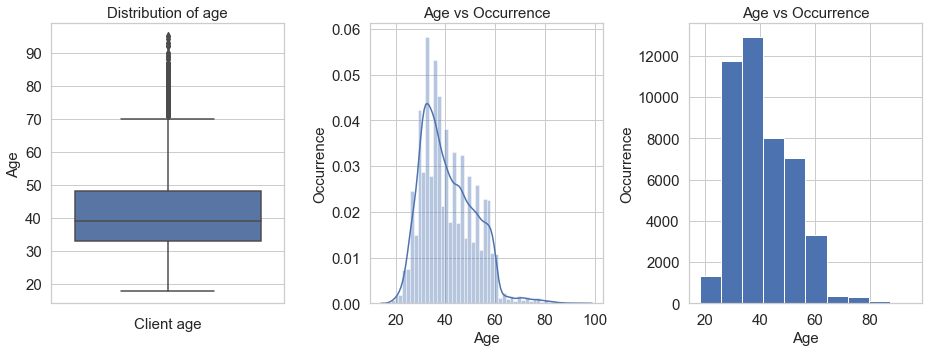

In [15]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=bank_data,orient='v',ax=ax1)
ax1.set_xlabel('Client age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(bank_data['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Age vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(bank_data['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Age vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

* We have clients with all the ages (minimum age 18 to maximum age 95).
* Mean and median have very less diference.
* age attribute does not have any missing values.
* age is right skewed. As more number of data points are present on right tail. The boxplot, distplot and histogram is also showing the same.


### Job

In [16]:
print('Jobs: \n', bank_data['job'].unique())

Jobs: 
 [management, technician, entrepreneur, blue-collar, unknown, ..., services, self-employed, unemployed, housemaid, student]
Length: 12
Categories (12, object): [management, technician, entrepreneur, blue-collar, ..., self-employed, unemployed, housemaid, student]


In [17]:
bank_data.groupby('job').size()

job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64

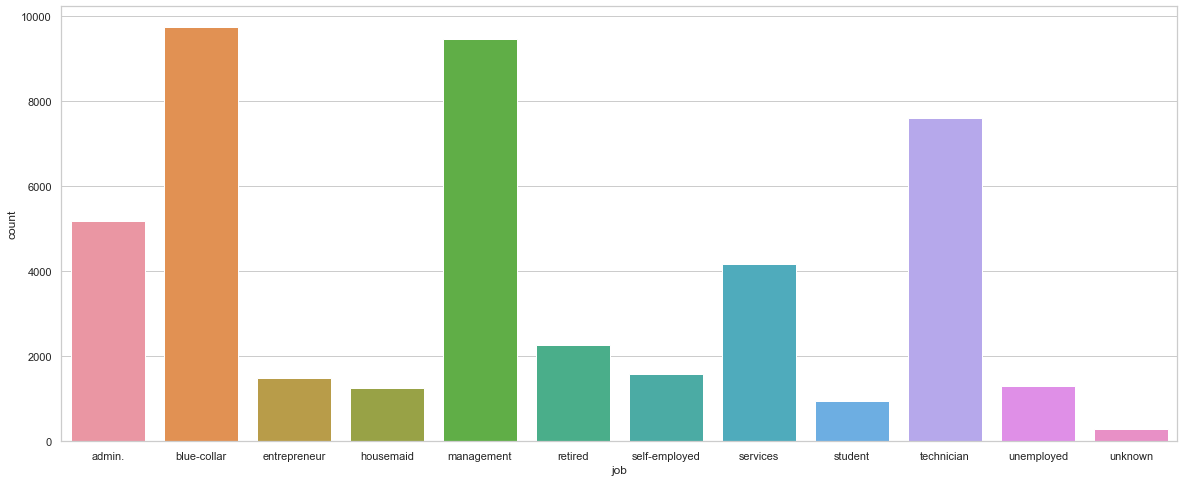

In [18]:
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(bank_data['job'],data=bank_data)
ax1.set_xlabel('Job', fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.set_title('Job vs Count', fontsize=18)
ax1.tick_params(labelsize=20)

In [19]:
#Optimize the number of classes in job
bank_data['job']=np.where(bank_data['job']=='blue-collar','worker',bank_data['job'])
bank_data['job']=np.where(bank_data['job']=='housemaid','worker',bank_data['job'])
bank_data['job']=np.where(bank_data['job']=='management','managerial',bank_data['job'])
bank_data['job']=np.where(bank_data['job']=='services','managerial',bank_data['job'])
bank_data['job']=np.where(bank_data['job']=='admin','managerial',bank_data['job'])
bank_data['job']=np.where(bank_data['job']=='enterpreneur','managerial',bank_data['job'])

bank_data['job'].unique()

array(['managerial', 'technician', 'entrepreneur', 'worker', 'unknown',
       'retired', 'admin.', 'self-employed', 'unemployed', 'student'],
      dtype=object)

* Job attribute shows the clients job information.
* It also shows that there are some unknown values. We do not know about the jobs of some clients. It indicates the missing values.
* Countplot shows that blue-collar, management, and technician clients have more subscriptions than the other clients. 

### Marital

In [20]:
print('Marital: \n', bank_data['marital'].unique())

Marital: 
 [married, single, divorced]
Categories (3, object): [married, single, divorced]


In [21]:
bank_data.groupby('marital').size()

marital
divorced     5207
married     27214
single      12790
dtype: int64

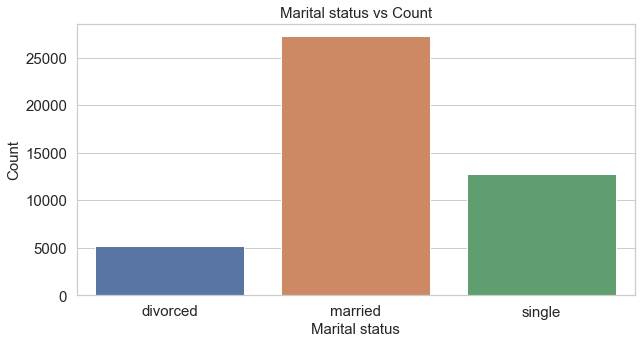

In [22]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['marital'],data=bank_data)
ax.set_xlabel('Marital status', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital status vs Count', fontsize=15)
ax.tick_params(labelsize=15)

* It shows that married people are taking more subscriptions than the other people.

### Education

In [23]:
print('Education: \n', bank_data['education'].unique())

Education: 
 [tertiary, secondary, unknown, primary]
Categories (4, object): [tertiary, secondary, unknown, primary]


In [24]:
bank_data.groupby('education').size()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

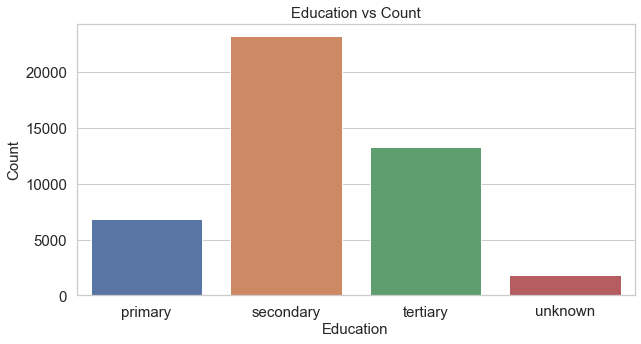

In [25]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['education'],data=bank_data)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education vs Count', fontsize=15)
ax.tick_params(labelsize=15)

### Default, Housing, Loan

In [26]:
print('Default: \n', bank_data['default'].unique())

Default: 
 [no, yes]
Categories (2, object): [no, yes]


In [27]:
bank_data.groupby('default').size()

default
no     44396
yes      815
dtype: int64

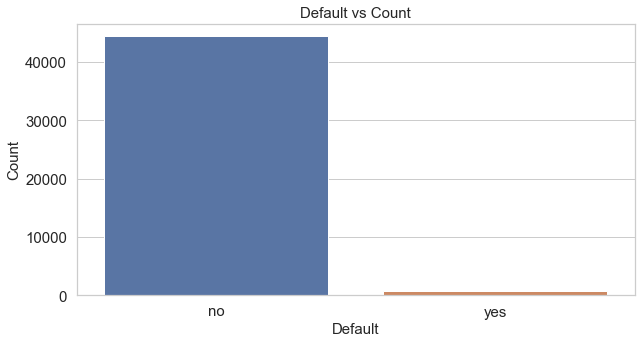

In [28]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['default'],data=bank_data)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [29]:
print('Housing: \n', bank_data['housing'].unique())

Housing: 
 [yes, no]
Categories (2, object): [yes, no]


In [30]:
bank_data.groupby('housing').size()

housing
no     20081
yes    25130
dtype: int64

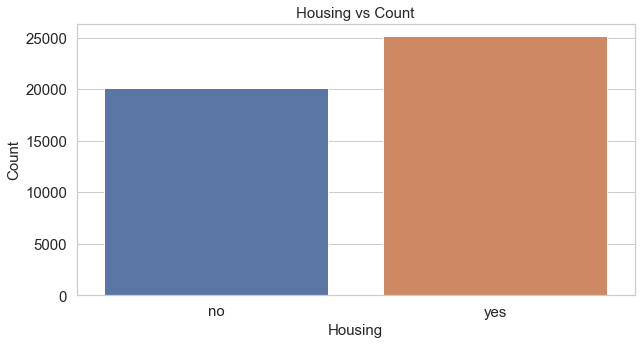

In [31]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['housing'],data=bank_data)
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing vs Count', fontsize=15)
ax.tick_params(labelsize=15)

In [32]:
print('Loan: \n', bank_data['loan'].unique())

Loan: 
 [no, yes]
Categories (2, object): [no, yes]


In [33]:
bank_data.groupby('loan').size()

loan
no     37967
yes     7244
dtype: int64

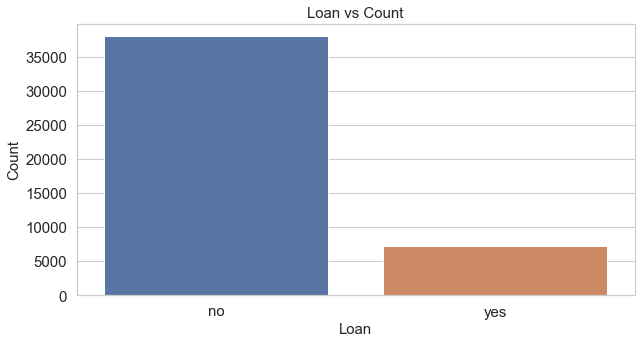

In [34]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['loan'],data=bank_data)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)

### Balance

#### Central Values

In [35]:
print('Minimum balance: ', bank_data['balance'].min())
print('Maximum balance: ',bank_data['balance'].max())
print('Mean value: ', bank_data['balance'].mean())
print('Median value: ',bank_data['balance'].median())
print('Standard deviation: ', bank_data['balance'].std())
print('Null values: ',bank_data['balance'].isnull().any())

Minimum balance:  -8019
Maximum balance:  102127
Mean value:  1362.2720576850766
Median value:  448.0
Standard deviation:  3044.7658291686002
Null values:  False


#### Quartiles

In [36]:
Q1=bank_data['balance'].quantile(q=0.25)
Q3=bank_data['balance'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  72.0
3st Quartile (Q3) is:  1428.0


#### Outlier detection from Interquartile range (IQR)

In [37]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Balance: ', L_outliers)
print('Upper outliers in Balance: ', U_outliers)

Lower outliers in Balance:  -1962.0
Upper outliers in Balance:  3462.0


In [38]:
print('Number of outliers in Balance upper : ', bank_data[bank_data['balance']>643]['balance'].count())
print('Number of outliers in Balance lower : ', bank_data[bank_data['balance']<-221]['balance'].count())
print('% of Outlier in Balance upper: ',round(bank_data[bank_data['balance']>643]['balance'].count()*100/len(bank_data)), '%')
print('% of Outlier in Balancee lower: ',round(bank_data[bank_data['balance']<-221]['balance'].count()*100/len(bank_data)), '%')

Number of outliers in Balance upper :  18980
Number of outliers in Balance lower :  1922
% of Outlier in Balance upper:  42.0 %
% of Outlier in Balancee lower:  4.0 %


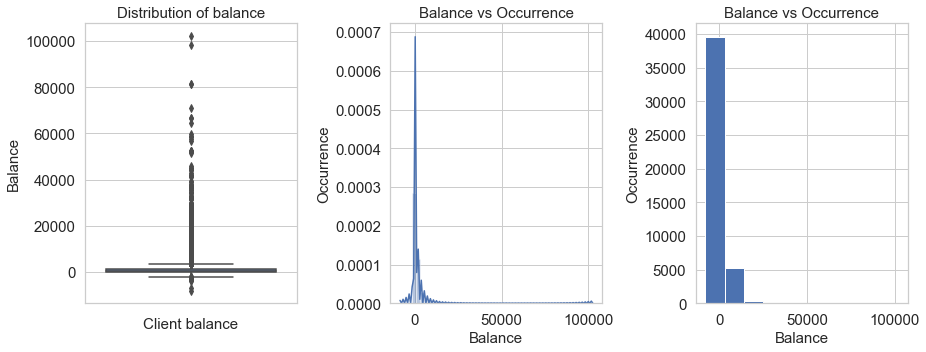

In [39]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='balance',data=bank_data,orient='v',ax=ax1)
ax1.set_xlabel('Client balance', fontsize=15)
ax1.set_ylabel('Balance', fontsize=15)
ax1.set_title('Distribution of balance', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(bank_data['balance'],ax=ax2)
ax2.set_xlabel('Balance', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Balance vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(bank_data['balance'])
ax3.set_xlabel('Balance', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('Balance vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

* Mean and median are different.
* balance is right skewed. As more number of data points are present on right tail. The boxplot, distplot and histogram is also showing the same.
* balance attribute does not have any missing values.


### Contact

In [40]:
print('Contact: \n', bank_data['contact'].unique())

Contact: 
 [unknown, cellular, telephone]
Categories (3, object): [unknown, cellular, telephone]


In [41]:
bank_data.groupby('contact').size()

contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64

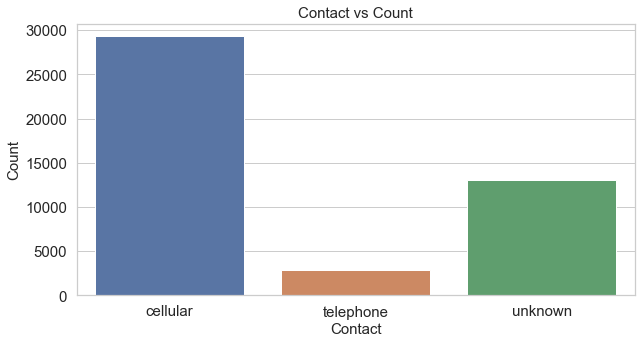

In [42]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['contact'],data=bank_data)
ax.set_xlabel('Contact', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Contact vs Count', fontsize=15)
ax.tick_params(labelsize=15)

### Day, Month

In [43]:
print('Day: \n', bank_data['loan'].unique())
print('Month: \n', bank_data['loan'].unique())

Day: 
 [no, yes]
Categories (2, object): [no, yes]
Month: 
 [no, yes]
Categories (2, object): [no, yes]


In [44]:
print('Count values in Day: \n',bank_data.groupby('loan').size())
print('Count values in Month: \n', bank_data.groupby('loan').size())

Count values in Day: 
 loan
no     37967
yes     7244
dtype: int64
Count values in Month: 
 loan
no     37967
yes     7244
dtype: int64


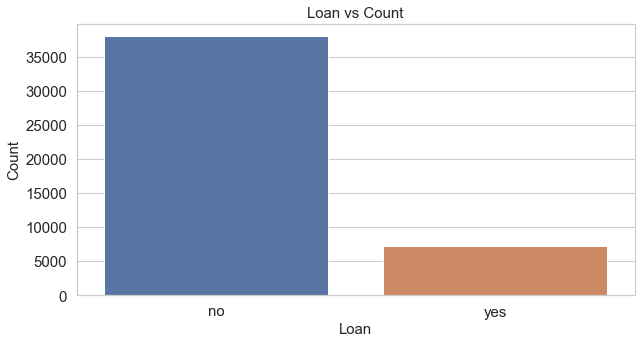

In [45]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['loan'],data=bank_data)
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan vs Count', fontsize=15)
ax.tick_params(labelsize=15)

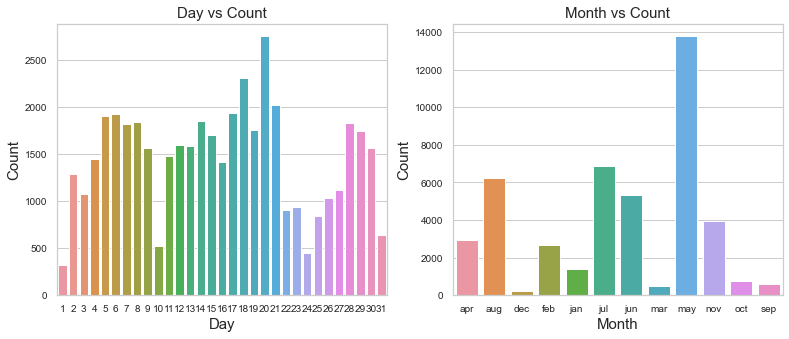

In [46]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#countplot
sns.countplot(bank_data['day'],data=bank_data,ax=ax1)
ax1.set_xlabel('Day', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.set_title('Day vs Count', fontsize=15)
ax1.tick_params(labelsize=10)

#distplot
sns.countplot(bank_data['month'],data=bank_data,ax=ax2)
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.set_title('Month vs Count', fontsize=15)
ax2.tick_params(labelsize=10)

### Duration

#### Central Values

In [47]:
print('Minimum duration calls in seconds: ', bank_data['duration'].min())
print('Maximum duration calls in seconds: ',bank_data['duration'].max())
print('Mean duration calls in seconds: ', bank_data['duration'].mean())
print('Median duration calls in seconds: ',bank_data['duration'].median())
print('Standard deviation: ', bank_data['duration'].std())
print('Null values: ',bank_data['duration'].isnull().any())

Minimum duration calls in seconds:  0
Maximum duration calls in seconds:  4918
Mean duration calls in seconds:  258.1630797814691
Median duration calls in seconds:  180.0
Standard deviation:  257.52781226517095
Null values:  False


#### Quartiles

In [48]:
Q1=bank_data['duration'].quantile(q=0.25)
Q3=bank_data['duration'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)

1st Quartile (Q1) is:  103.0
3st Quartile (Q3) is:  319.0


#### Outlier detection from Interquartile range (IQR)

In [49]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)


Lower outliers in Duration:  -221.0
Upper outliers in Duration:  643.0


In [50]:
print('Number of outliers in Duration upper : ', bank_data[bank_data['duration']>643]['duration'].count())
print('Number of outliers in Balance lower : ', bank_data[bank_data['duration']<-221]['duration'].count())
print('% of Outlier in Duration upper: ',round(bank_data[bank_data['duration']>643]['duration'].count()*100/len(bank_data)), '%')
print('% of Outlier in Duration lower: ',round(bank_data[bank_data['duration']<-221]['duration'].count()*100/len(bank_data)), '%')

Number of outliers in Duration upper :  3235
Number of outliers in Balance lower :  0
% of Outlier in Duration upper:  7.0 %
% of Outlier in Duration lower:  0.0 %


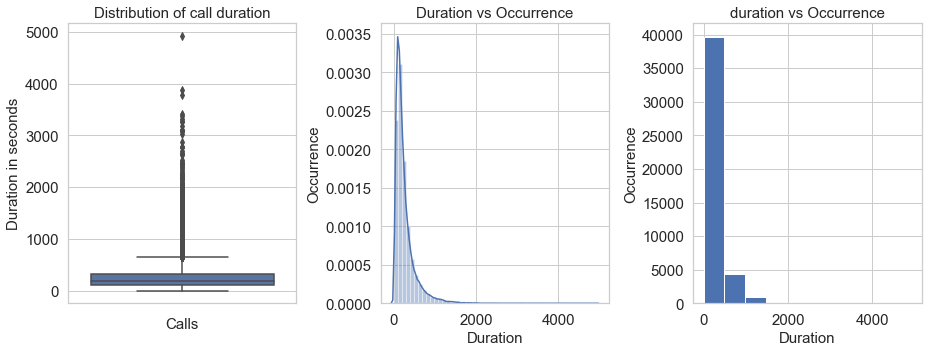

In [51]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='duration',data=bank_data,orient='v',ax=ax1)
ax1.set_xlabel('Calls', fontsize=15)
ax1.set_ylabel('Duration in seconds', fontsize=15)
ax1.set_title('Distribution of call duration', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(bank_data['duration'],ax=ax2)
ax2.set_xlabel('Duration', fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.set_title('Duration vs Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(bank_data['duration'])
ax3.set_xlabel('Duration', fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.set_title('duration vs Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

### poutcome

In [52]:
print('Poutcome: \n', bank_data['poutcome'].unique())

Poutcome: 
 [unknown, failure, other, success]
Categories (4, object): [unknown, failure, other, success]


In [53]:
print(bank_data.groupby('poutcome').size())

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64


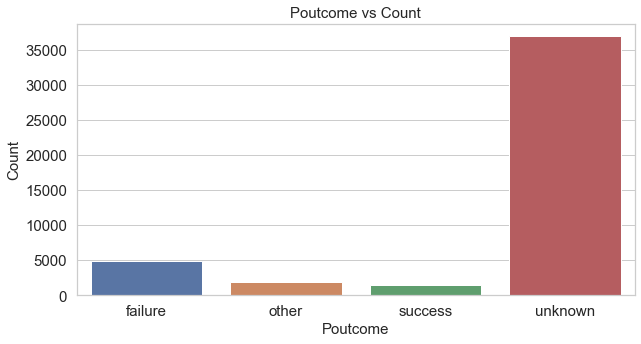

In [54]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['poutcome'],data=bank_data)
ax.set_xlabel('Poutcome', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Poutcome vs Count', fontsize=15)
ax.tick_params(labelsize=15)

### Dependent attribute
### Target

In [55]:
print('Target: \n', bank_data['Target'].unique())

Target: 
 [no, yes]
Categories (2, object): [no, yes]


In [56]:
print(bank_data.groupby('Target').size())

Target
no     39922
yes     5289
dtype: int64


* Highly imbalance Target column as there are 39922 customers who do not have subscribed the term deposit and there are only 5289 customers who have subscribed the term deposit.

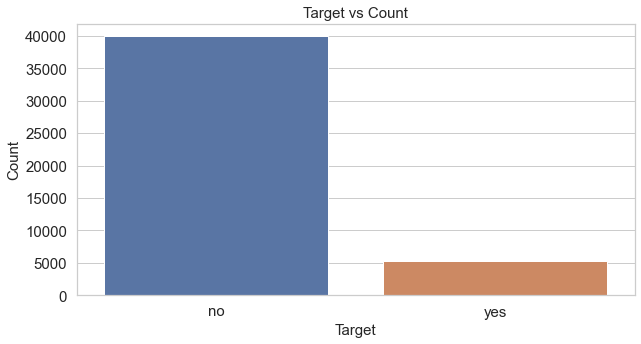

In [57]:
fig, ax=plt.subplots()
fig.set_size_inches(10,5)

#countplot
sns.countplot(bank_data['Target'],data=bank_data)
ax.set_xlabel('Target', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Target vs Count', fontsize=15)
ax.tick_params(labelsize=15)

## Encode the categorical variables

In [58]:
#Encoding of categorical variables

labelencoder_X=LabelEncoder()
bank_data['job']=labelencoder_X.fit_transform(bank_data['job'])
bank_data['marital']=labelencoder_X.fit_transform(bank_data['marital'])
bank_data['education']=labelencoder_X.fit_transform(bank_data['education'])
bank_data['default']=labelencoder_X.fit_transform(bank_data['default'])
bank_data['housing']=labelencoder_X.fit_transform(bank_data['housing'])
bank_data['loan']=labelencoder_X.fit_transform(bank_data['loan'])
bank_data['contact']= labelencoder_X.fit_transform(bank_data['contact']) 
bank_data['month']= labelencoder_X.fit_transform(bank_data['month']) 
bank_data['poutcome'] = labelencoder_X.fit_transform(bank_data['poutcome'])
bank_data['Target'] = labelencoder_X.fit_transform(bank_data['Target'])

In [59]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,2,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,6,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,1,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,9,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,8,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [60]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.473779,3.205847,0.0,2.0,4.0,7.0,9.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


## 3.2. Multivariate Analysis 

## Visualization

In [61]:
# corrlation matrix 
cor=bank_data.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.019980,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.019980,1.000000,-0.012009,-0.320070,0.006475,-0.036583,0.066957,-0.015011,0.094748,-0.007327,0.015160,0.010794,0.015967,-0.007486,-0.023964,0.023881,-0.053212
marital,-0.403240,-0.012009,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,-0.320070,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,0.006475,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,-0.036583,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,0.066957,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.015011,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,0.094748,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,-0.007327,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


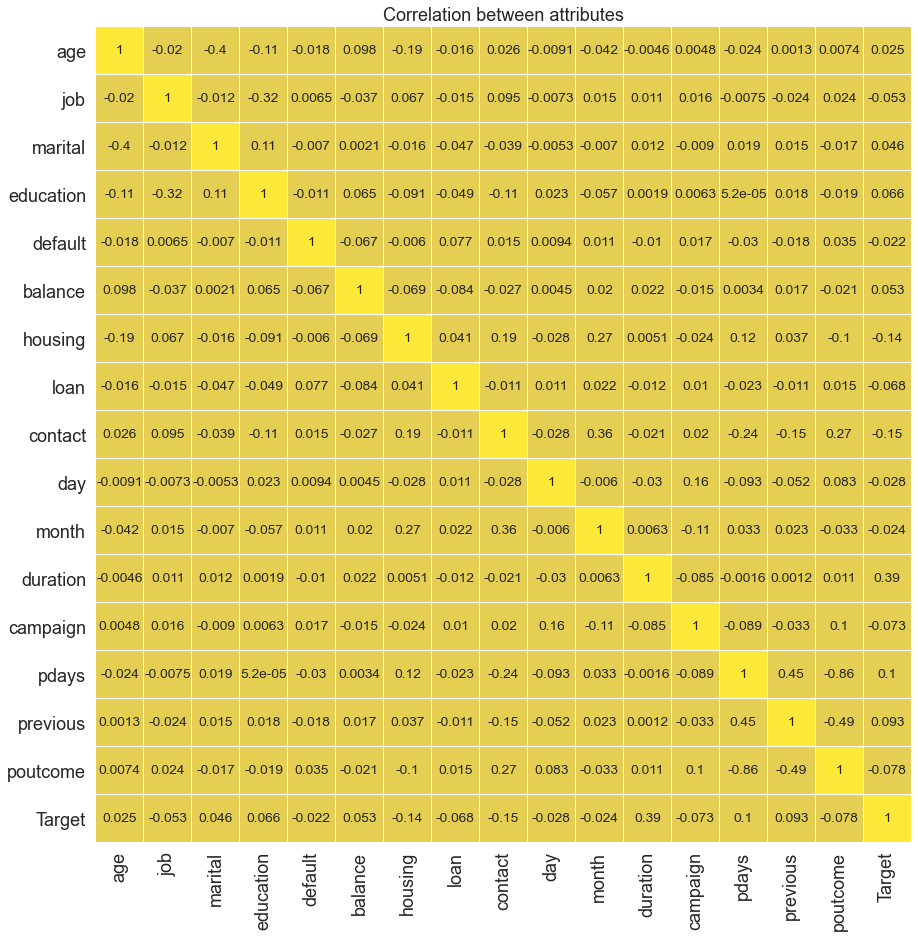

In [62]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.8,cmap='cividis', annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation between attributes',fontsize=18)
ax.tick_params(labelsize=18)

* There is some between duration, pdays, previous, education, balance,marital and age with the Target attribute.
* age does not have much relation with other attributes.


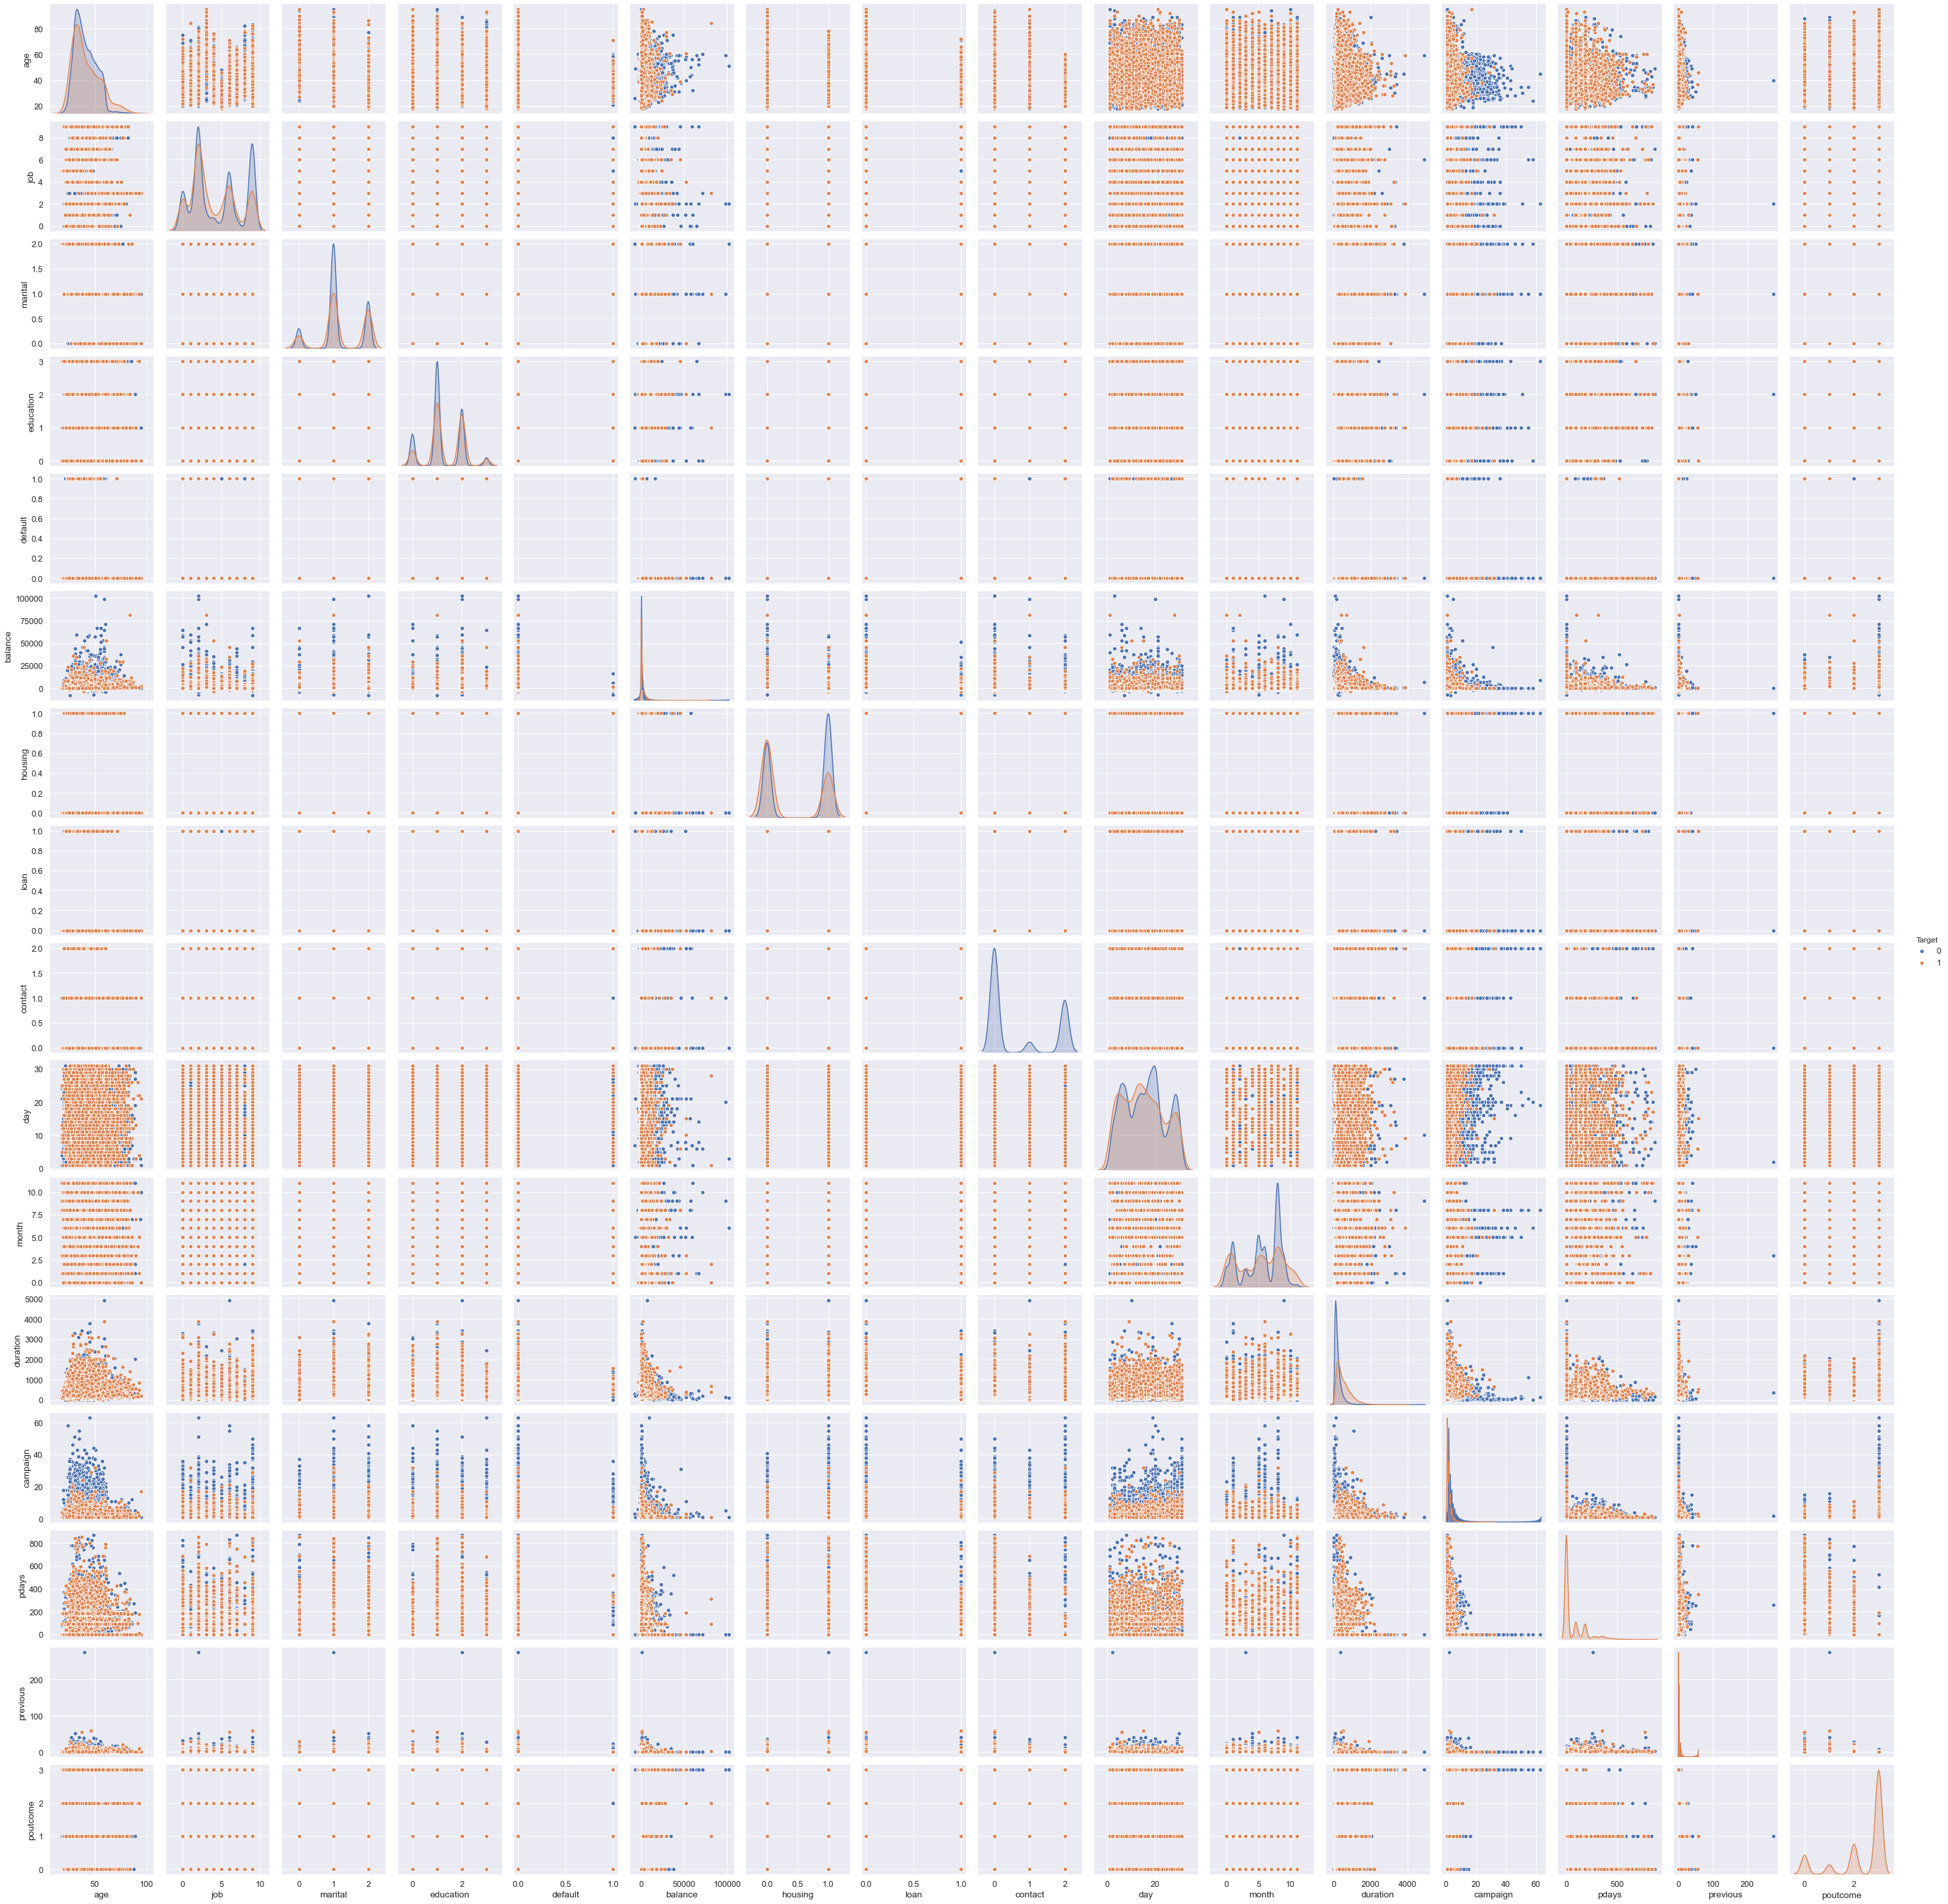

In [63]:
sns.pairplot(bank_data,hue='Target')

### Analysis of Continous attributes ( Age, balance) vs Categorical attribute (Target)  

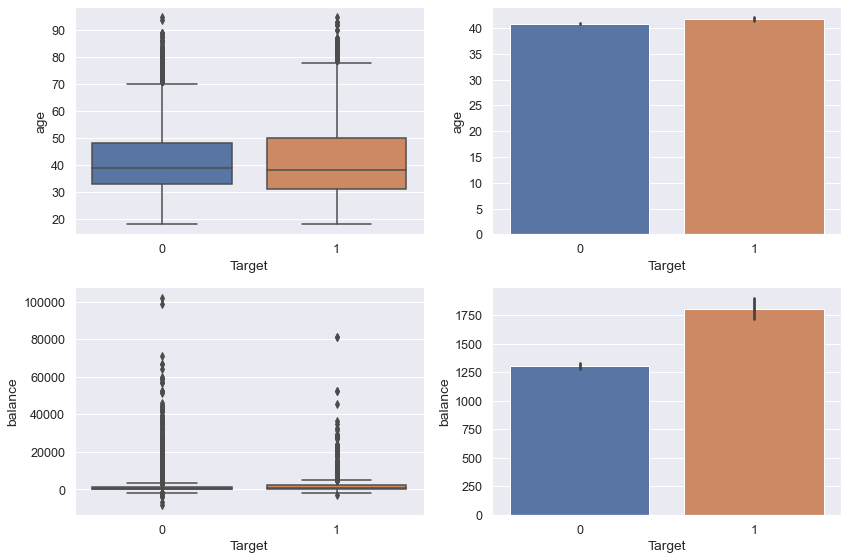

In [64]:
fig, ax=plt.subplots(2,2,figsize=(12,8))
# Categorical vs Continuous ----Target vs Age
#boxplot
sns.boxplot(x="Target", y="age", data=bank_data,ax=ax[0][0])

#barplot
sns.barplot(x="Target", y="age", data=bank_data,ax=ax[0][1])


# Categorical vs Continuous ----Target vs balance
#boxplot
sns.boxplot(x="Target", y="balance", data=bank_data,ax=ax[1][0])


#barplot
sns.barplot(x="Target", y="balance", data=bank_data,ax=ax[1][1])

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 


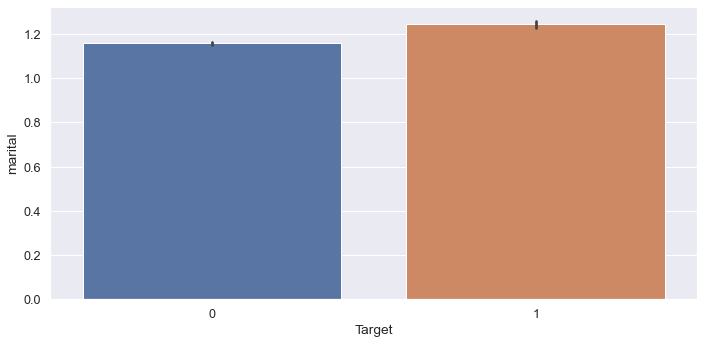

In [65]:
# Categorical vs Categorical ----Target vs marital
fig, ax1=plt.subplots(1,1,figsize=(10,5))

#barplot
sns.barplot(x="Target", y="marital", data=bank_data,ax=ax1)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

ax2.tick_params(labelsize=15)


plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 


## 4. Model Building: Without managing Imbalance the Target column and Normalizing the columns

### Splitting the data

In [66]:
#independent and dependent variables
X=bank_data.loc[:,bank_data.columns!='Target']
y=bank_data.loc[:,bank_data.columns=='Target']

In [67]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

# Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve , roc_auc_score , classification_report , confusion_matrix

In [69]:
lr = LogisticRegression()

In [70]:
lr.fit(X_train , y_train)

LogisticRegression()

In [71]:
y_pred = lr.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.8860955470362725

In [73]:
# Accuracy
print('Confusion Matrix: \n',confusion_matrix(y_test , y_pred))
print('-'*50)
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('AUC : ' , roc_auc_score(y_test, y_pred))
print('-'*50)
print('Classification Report: \n',classification_report(y_test , y_pred))

Confusion Matrix: 
 [[11739   230]
 [ 1315   280]]
--------------------------------------------------
Accuracy Score:  0.8860955470362725
AUC :  0.5781661402719827
--------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.55      0.18      0.27      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564



Text(0, 0.5, 'True Positive Rate')

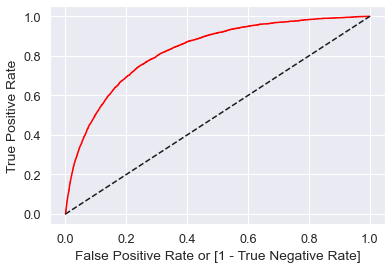

In [74]:
fpr, tpr, thresholds = roc_curve(y, lr.predict_proba (X)[:,1])   # proba = probaility

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

## Scaling the columns

In [75]:
#independent and dependent variables
bank_new = bank_data
X = bank_new.loc[:,bank_new.columns!='Target']
y = bank_new.loc[:,bank_new.columns=='Target']

In [76]:
# Split X and y into training and test set in 70:30 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
columns=X_train.columns

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
X_train[:1]

array([[ 1.61519942, -0.77068628, -0.27522248, -1.64055161, -0.13506755,
        -0.11392829, -1.11991981, -0.43758857,  1.51726654,  0.2626326 ,
         1.15471277, -0.20398668, -0.57035592, -0.41108056, -0.23732307,
         0.44500447]])

### Building Model

In [79]:
lr = LogisticRegression()

In [80]:
lr.fit(X_train , y_train)

LogisticRegression()

In [81]:
y_pred = lr.predict(X_test)

In [82]:
# Accuracy
print('Confusion Matrix: \n',confusion_matrix(y_test , y_pred))
print('-'*50)
print('Accuracy Score: ', accuracy_score(y_test,y_pred))
print('AUC : ' , roc_auc_score(y_test, y_pred))
print('-'*50)
print('Classification Report: \n',classification_report(y_test , y_pred))

Confusion Matrix: 
 [[11712   257]
 [ 1256   339]]
--------------------------------------------------
Accuracy Score:  0.8884547331170746
AUC :  0.5955335243003674
--------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.57      0.21      0.31      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.60      0.62     13564
weighted avg       0.86      0.89      0.87     13564



Text(0, 0.5, 'True Positive Rate')

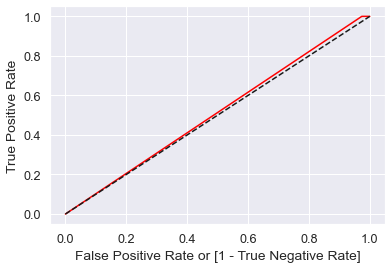

In [83]:
fpr, tpr, thresholds = roc_curve(y, lr.predict_proba (X)[:,1])   # proba = probaility

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

**It means that the model will predict 89% correctly the customers who will subscribe term deposit and who will not.
 This model performed well as compared to unstandardized class models.**